# TP - Paso a paso

Importo las librerias necesarias para realizar el trabajo:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf


Matplotlib is building the font cache; this may take a moment.


Guardo en una variable el archivo que contiene todos los nombres de las acciones para la bolsa de madrid o ibex segun se seleccione dentro de la funcion *open*.

In [2]:
f = open('madrid', "r") #r significa read

Ahora defino una función que recibe el nombre de una acción y devuelve una tupla con su nombre abreviado, el nombre, su valor actual y la historia de la misma.

In [3]:
def getTicker(nombre):
    accion = yf.Ticker(nombre)
    if "currentPrice" in accion.info: #Solo se consideran válidas aquellas que tengan un valor actual
        return (nombre, accion.info["longName"], accion.info["currentPrice"], accion.history)
    else:
        return []


Para obtener los detalles de cada una de las acciones contenidas en el archivo creo una lista, llamada acciones, a la cual agregaré cada resultado devuelto por *getTicker*, finalmente ordenaré la lista por la posición que tiene el valor de las acciones:

In [4]:
acciones = []
for l in f: #f variable que contiene lista de nombre de acciones doc madrid o ibex; l línea en la lista
    accion = getTicker(l.split()[0])
    if len(accion) != 0:
        acciones.append(accion)
acciones.sort(key=lambda x: x[2], reverse=True)

Procedo a mostrar todas las acciones obtenidas:

In [5]:
df_todos = pd.DataFrame(np.array(acciones)[:, :3], columns=['Acción', 'Nombre', 'Valor'])
df_todos


,Acción,Nombre,Valor
0,ANA.MC,"Acciona, S.A.",143.4
1,BDL.MC,"Barón de Ley, S.A.",113
2,CLNX.MC,"Cellnex Telecom, S.A.",58.64
3,FDR.MC,"Fluidra, S.A.",37.2
4,AIR,AAR Corp.,32.87
5,CIE.MC,"CIE Automotive, S.A.",23.62
6,ELE.MC,"Endesa, S.A.",20.32
7,EBRO.MC,"Ebro Foods, S.A.",16.72
8,FCC.MC,"Fomento de Construcciones y Contratas, S.A.",11.32
9,IBE.MC,"Iberdrola, S.A.",10.275


Extraigo de todas las obtenidas las dos mayores y las dos menores:

In [6]:
maximos = np.array(acciones[0:2])
minimos = np.array(acciones[-2:])
df = pd.DataFrame(np.concatenate((maximos[:, :3],minimos[:, :3]), axis=0),
                  columns=['Acción', 'Nombre', 'Valor'])
df


,Acción,Nombre,Valor
0,ANA.MC,"Acciona, S.A.",143.4
1,BDL.MC,"Barón de Ley, S.A.",113
2,MDF.MC,"Duro Felguera, S.A.",0.833
3,OLE.MC,"Deoleo, S.A.",0.354


Ahora procederé a mostrar el valor histórico de inicio y cierre de estas 4 acciones:

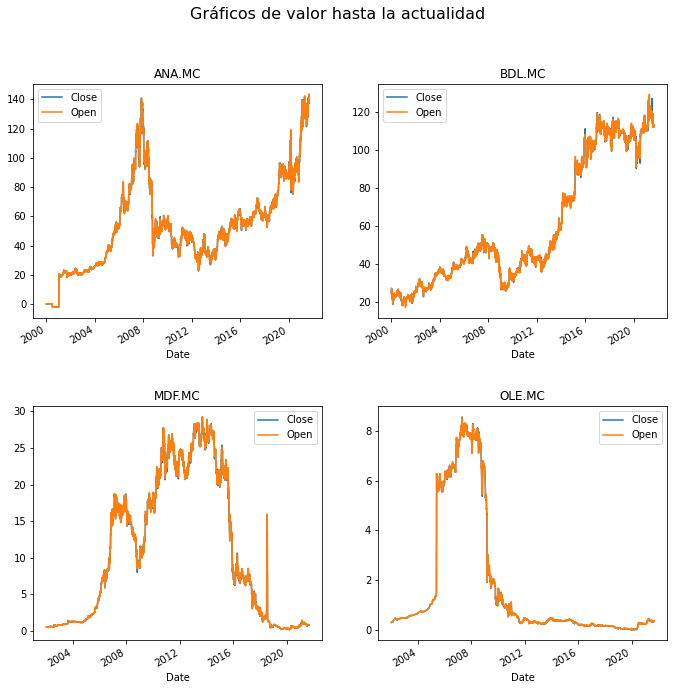

In [7]:
history = np.concatenate((maximos[:,-1],minimos[:,-1]), axis=0)
nombres = np.concatenate((maximos[:, 0], minimos[:, 0]), axis=0)
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
fig.suptitle('Gráficos de valor hasta la actualidad', fontsize=16)
for i in range(4):
    axe = plt.subplot(2,2,i+1)
    axe.set_title(nombres[i])
    data = history[i](period='max')  #pandas
    data.plot(kind='line', y="Close", ax=axe) #imprime en grafico de lineas, datos de cierre/ ax lugar dónde imprimir
    data.plot(kind='line', y="Open", ax=axe) #imprime en gráfico de líneas, datos de apertura
fig.tight_layout(pad=3.0)
